In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Settings
IMG_SIZE = 128
DATA_DIR = '/plant.zip'
classes = ['Tomato___Healthy', 'Tomato___Early_blight', 'Tomato___Late_blight']

X, y = [], []

for label, category in enumerate(classes):
    folder_path = os.path.join(DATA_DIR, category)
    for img in os.listdir(folder_path):
        try:
            image = load_img(os.path.join(folder_path, img), target_size=(IMG_SIZE, IMG_SIZE))
            image = img_to_array(image) / 255.0
            X.append(image)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NotADirectoryError: [Errno 20] Not a directory: '/plant.zip/Tomato___Healthy'

In [3]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Tomato_Leaves_Dataset.zip to Tomato_Leaves_Dataset.zip


In [5]:
import zipfile

zip_path = "/content/Tomato_Leaves_Dataset.zip"  # Change this if your file name is different
extract_path = "/content/Tomato_Leaves_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Settings
IMG_SIZE = 128
DATA_DIR = "/content/Tomato_Leaves_Dataset"

classes = ['Tomato___Healthy', 'Tomato___Early_blight', 'Tomato___Late_blight']

X, y = [], []

for label, category in enumerate(classes):
    folder_path = os.path.join(DATA_DIR, category)
    for img in os.listdir(folder_path):
        try:
            image = load_img(os.path.join(folder_path, img), target_size=(IMG_SIZE, IMG_SIZE))
            image = img_to_array(image) / 255.0
            X.append(image)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Tomato_Leaves_Dataset/Tomato___Healthy'

In [7]:
import os

for root, dirs, files in os.walk("/content"):
    print(root)


/content
/content/.config
/content/.config/logs
/content/.config/logs/2025.06.18
/content/.config/configurations
/content/drive
/content/drive/.shortcut-targets-by-id
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Task Management Project
/content/drive/.Trash-0
/content/drive/.Trash-0/files
/content/drive/.Trash-0/info
/content/drive/.Encrypted
/content/drive/.Encrypted/.shortcut-targets-by-id
/content/drive/.Encrypted/MyDrive
/content/drive/.Encrypted/MyDrive/Colab Notebooks
/content/drive/.Encrypted/MyDrive/Task Management Project
/content/Tomato_Leaves_Dataset
/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset
/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset/Tomato_Early_blight
/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset/Tomato_healthy
/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset/Tomato_Late_blight
/content/sample_data


In [8]:
/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset/


NameError: name 'content' is not defined

In [11]:


import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Settings
IMG_SIZE = 128
DATA_DIR = "/content/Tomato_Leaves_Dataset/Tomato_Leaves_Dataset"
classes = ['Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Late_blight']

X, y = [], []

for label, category in enumerate(classes):
    folder_path = os.path.join(DATA_DIR, category)
    for img in os.listdir(folder_path):
        try:
            image = load_img(os.path.join(folder_path, img), target_size=(IMG_SIZE, IMG_SIZE))
            image = img_to_array(image) / 255.0
            X.append(image)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5269 - loss: 1.2193 - val_accuracy: 0.8278 - val_loss: 0.4330
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8702 - loss: 0.3014 - val_accuracy: 0.9194 - val_loss: 0.2462
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9233 - loss: 0.1961 - val_accuracy: 0.8819 - val_loss: 0.3310
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9402 - loss: 0.1467 - val_accuracy: 0.9167 - val_loss: 0.2441
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9689 - loss: 0.0921 - val_accuracy: 0.9236 - val_loss: 0.2325
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9604 - loss: 0.1071 - val_accuracy: 0.9111 - val_loss: 0.3206
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9841 - loss: 0.0505 - val_accuracy: 0.9236 - val_loss: 0.2514
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9896 - loss: 0.0355 - val_accuracy: 0.9222 - v

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9061 - loss: 0.2828
Test Accuracy: 91.33%


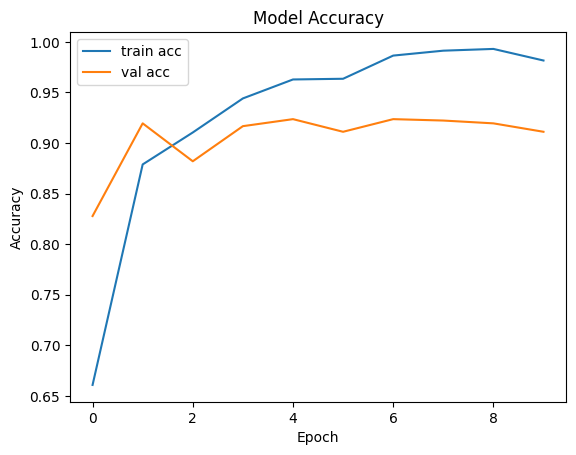

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    print(f"Predicted class: {classes[class_index]}")

# Example
predict_image("/image-shows-tomato-plant-growing-natural-outdoor-setting-mixture-ripening-unripe-tomatoes-attached-to-vine-362687812.webp")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Predicted class: Tomato_Late_blight
